In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy import stats
%matplotlib inline

Подгрузим данные и посмотрим на первые несколько строк из таблицы

In [ ]:
df = pd.read_csv('./vk_main.csv', sep='\t')
pf = pd.read_csv('./vk_data_profile.csv', sep='\t')
df.head()
pf.head()

,Unnamed: 0,uid,Unnamed: 0.1,first_name,last_name,is_closed,city,home_town,male_dummy,relation_cat,...,people_main_cat,political_cat,lang_cnt,english_dummy,change_city_school_cnt,last_bukva_class_str,schools_cnt,is_bmm,in_hse_memes_group,likes_memes
0,0,182152789,0,Александра,Абашкова,False,Москва,Москва,0,не указано,...,NaN,NaN,3.0,1.0,1.0,182152789,NaN,True,True,60.0
1,1,148020433,1,Анастасия,Чуфистова,False,Рязань,Рязань,0,не указано,...,0.0,NaN,1.0,0.0,1.0,148020433,а,True,True,0.0
2,2,138413935,2,Александр,Головачев,False,Москва,Омск,1,не женат/не замужем,...,ум и креативность,умеренные,2.0,1.0,NaN,138413935,NaN,True,False,0.0
3,3,366261055,3,Анна,Лобанова,False,NaN,NaN,0,не указано,...,0.0,NaN,NaN,NaN,NaN,366261055,NaN,True,False,0.0
4,4,111252392,4,Алексей,Пузырный,False,NaN,NaN,1,NaN,...,NaN,NaN,NaN,NaN,NaN,111252392,NaN,True,True,21.0


In [ ]:
df['wall_text_len_cnt']

0         188.0
1      103157.0
2          83.0
3        5593.0
4        2681.0
         ...   
420         0.0
421        23.0
422     33098.0
423       705.0
424       929.0
Name: wall_text_len_cnt, Length: 425, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3f50a47c10>]],
      dtype=object)

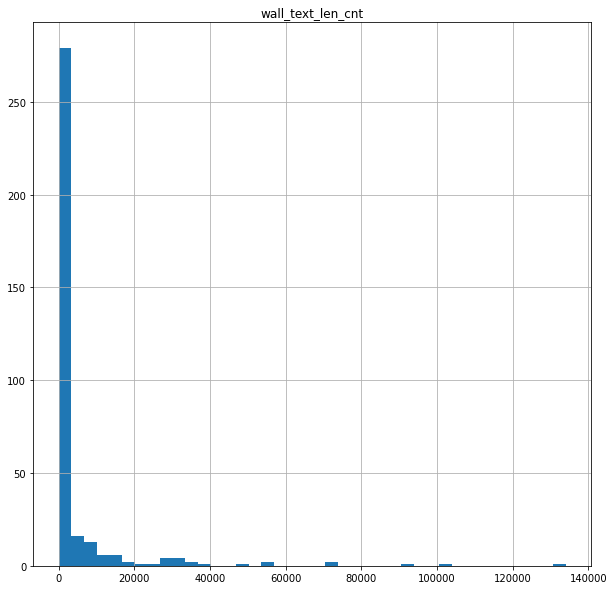

In [ ]:
df.hist(column = ['wall_text_len_cnt'], bins = 40, figsize = (10,10))

In [ ]:
(df.wall_text.str.contains("hse", case = False) | \
df.wall_text.str.contains('high school of economics, case = False')).sum()

2

Выведем имена любителей мемов
ascending = true по возратсанию, false по убыванию

In [ ]:
df.loc[df['likes_memes'] >= df.likes_memes.quantile(0.99)].sort_values('likes_memes', ascending = False)[['first_name','likes_memes']]

,first_name,likes_memes
134,Полина,1081.0
363,Николь,685.0
205,Александр,440.0
189,Данил,398.0


Построим гистограммы по количеству эмодзи и комментариев на стене 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3f508533d0>,
      dtype=object)

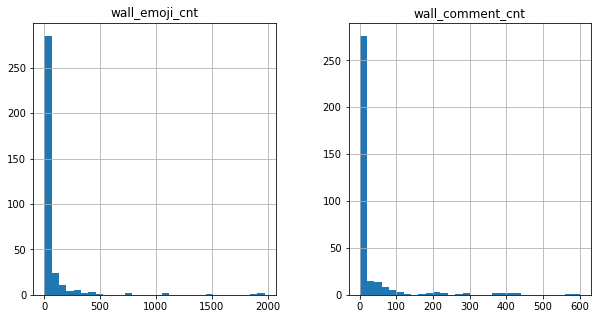

In [ ]:
df.hist(column = ['wall_emoji_cnt', 'wall_comment_cnt'], figsize = (10, 5), bins = 30)

In [ ]:
df[['wall_emoji_cnt', 'wall_comment_cnt']].describe().loc[['mean', '50%', 'std']]

,wall_emoji_cnt,wall_comment_cnt
mean,62.909621,29.632653
50%,2.000000,0.000000
std,226.657483,84.781448


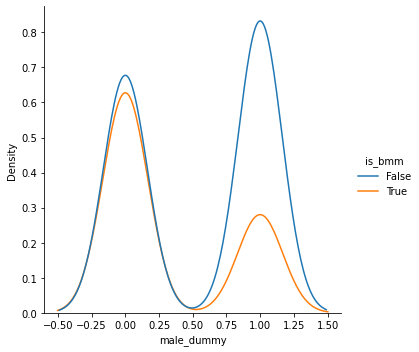

In [ ]:
sns.displot(data=df, x='male_dummy', hue = 'is_bmm', kind = 'kde',  fill=False)

In [ ]:
a = df.loc[df.male_dummy == True, ['male_dummy', 'is_bmm']].groupby('is_bmm').count()
b = df.loc[df.male_dummy == False, ['male_dummy', 'is_bmm']].groupby('is_bmm').count()
print(a/b)

        male_dummy
is_bmm            
False     1.228814
True      0.446429


Каждый студент добавляет к себе в друзья людей со своего потока. В переменной friends_mail_from_course_pct записана доля парней-друзей с потока (то, что переменная называется не male - опечатка).

Построим гистограммы для распределения доли парней в друзьях для девушек и для парней.

male_dummy
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: friends_mail_from_course_pct, dtype: object

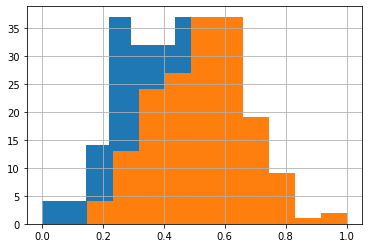

In [ ]:
df[['friends_mail_from_course_pct', 'male_dummy']].groupby('male_dummy')['friends_mail_from_course_pct'].hist()

Посчитаем среднее и дисперсию для обеих групп

In [ ]:
df[['friends_mail_from_course_pct', 'male_dummy']].groupby('male_dummy')['friends_mail_from_course_pct'].describe()[['mean', 'std']]

,mean,std
male_dummy,,
0,0.391522,0.140071
1,0.523007,0.153287


Проанализируем колонку со средним кол-во фото в месяц (photo_month_mean)

Построим на одной картинке гистограмы для распределения этого показателя по разным полам.


male_dummy
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: photo_month_mean, dtype: object

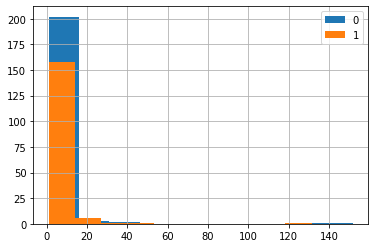

In [ ]:
df[['photo_month_mean', 'male_dummy']].groupby('male_dummy')['photo_month_mean'].hist(legend = True)

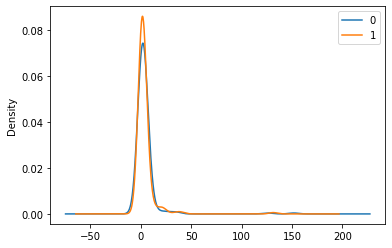

In [ ]:
df['photo_month_mean'][df['male_dummy']== 0].plot.kde()
df['photo_month_mean'][df['male_dummy']== 1].plot.kde()
plt.legend(labels=['0', '1'])

In [ ]:
df['photo_month_mean'][df['male_dummy']== 0].describe()[['mean', 'std', '50%']]

mean     4.453513
std     14.076101
50%      1.750000
Name: photo_month_mean, dtype: float64

In [ ]:
df['photo_month_mean'][df['male_dummy']== 1].describe()[['mean', 'std', '50%']]

mean     4.040629
std     11.327306
50%      1.500000
Name: photo_month_mean, dtype: float64

Уберем выбросы

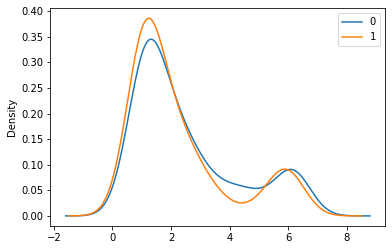

In [ ]:
fe_q = df['photo_month_mean'][df['male_dummy'] == False].quantile(0.01)
f_q_up = df['photo_month_mean'][df['male_dummy'] == False].quantile(0.9)

male_q = df['photo_month_mean'][df['male_dummy'] == True].quantile(0.01)
m_q_up = df['photo_month_mean'][df['male_dummy'] == True].quantile(0.9)

df['photo_month_mean'][df['male_dummy'] == False].clip(fe_q, f_q_up).plot.kde()
df['photo_month_mean'][df['male_dummy'] == True].clip(male_q, m_q_up).plot.kde()
plt.legend(labels=['0', '1'])